# Explore here

In [44]:
import numpy as np
import pandas as pd 

import seaborn as sns 
import matplotlib.pyplot as plt 
from colorama import Fore

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

import warnings 
warnings.filterwarnings('ignore')

np.random.seed(7)

In [45]:
import os
import shutil  # Import shutil module

# Check current directory for kaggle.json
print("Files in current directory:", os.listdir())

# Move kaggle.json to the correct location and set permissions
if 'kaggle.json' in os.listdir():
    os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)  # Ensure ~/.kaggle directory exists
    shutil.move('kaggle.json', os.path.expanduser('~/.kaggle/kaggle.json'))  # Use shutil.move instead of os.replace
    os.chmod(os.path.expanduser('~/.kaggle/kaggle.json'), 0o600)  # Set permissions
    print("kaggle.json moved and permissions set.")
else:
    print("kaggle.json not found in the current directory. Please upload it.")


Files in current directory: ['acea-water-prediction.zip', 'utils.py', 'explore.ipynb', 'app.py']
kaggle.json not found in the current directory. Please upload it.


In [46]:
!kaggle competitions download -c acea-water-prediction 



acea-water-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [47]:
import zipfile
import os

data_path = '/workspaces/eric-Time-Series-Project-Tutorial/src/acea-water-prediction.zip'  # Make sure this is the correct path to the zip file
extract_path = '/workspaces/eric-Time-Series-Project-Tutorial/data/processed'  # Path where you want to extract the files

# Unzipping the file
with zipfile.ZipFile(data_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Displaying the files to confirm
extracted_files = os.listdir(extract_path)
print("Extracted files:", extracted_files)


Extracted files: ['River_Arno.csv', 'datasets_description.ods', 'Water_Spring_Lupa.csv', 'Aquifer_Doganella.csv', 'Aquifer_Luco.csv', 'Aquifer_Auser.csv', 'Water_Spring_Madonna_di_Canneto.csv', 'Aquifer_Petrignano.csv', '.gitkeep', 'Water_Spring_Amiata.csv', 'datasets_description.xlsx', 'Lake_Bilancino.csv']


In [48]:
df = pd.read_csv("/workspaces/eric-Time-Series-Project-Tutorial/data/processed/Aquifer_Petrignano.csv")
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [49]:
# Remove old rows
df = df[df.Rainfall_Bastia_Umbra.notna()].reset_index(drop=True)
# Remove not usefull columns
df = df.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis=1)

In [50]:
# Simplify column names
df.columns = ['date', 'rainfall', 'depth_to_groundwater', 'temperature', 'drainage_volume', 'river_hydrometry']

targets = ['depth_to_groundwater']
features = [feature for feature in df.columns if feature not in targets]
df.head()

,date,rainfall,depth_to_groundwater,temperature,drainage_volume,river_hydrometry
0,01/01/2009,0.0,-31.14,5.2,-24530.688,2.4
1,02/01/2009,0.0,-31.11,2.3,-28785.888,2.5
2,03/01/2009,0.0,-31.07,4.4,-25766.208,2.4
3,04/01/2009,0.0,-31.05,0.8,-27919.296,2.4
4,05/01/2009,0.0,-31.01,-1.9,-29854.656,2.3


In [51]:
from datetime import datetime, date 

df['date'] = pd.to_datetime(df['date'], format = '%d/%m/%Y')
df.head().style.set_properties(subset=['date'], **{'background-color': 'dodgerblue'})

,date,rainfall,depth_to_groundwater,temperature,drainage_volume,river_hydrometry
0,2009-01-01 00:00:00,0.000000,-31.140000,5.200000,-24530.688000,2.400000
1,2009-01-02 00:00:00,0.000000,-31.110000,2.300000,-28785.888000,2.500000
2,2009-01-03 00:00:00,0.000000,-31.070000,4.400000,-25766.208000,2.400000
3,2009-01-04 00:00:00,0.000000,-31.050000,0.800000,-27919.296000,2.400000
4,2009-01-05 00:00:00,0.000000,-31.010000,-1.900000,-29854.656000,2.300000


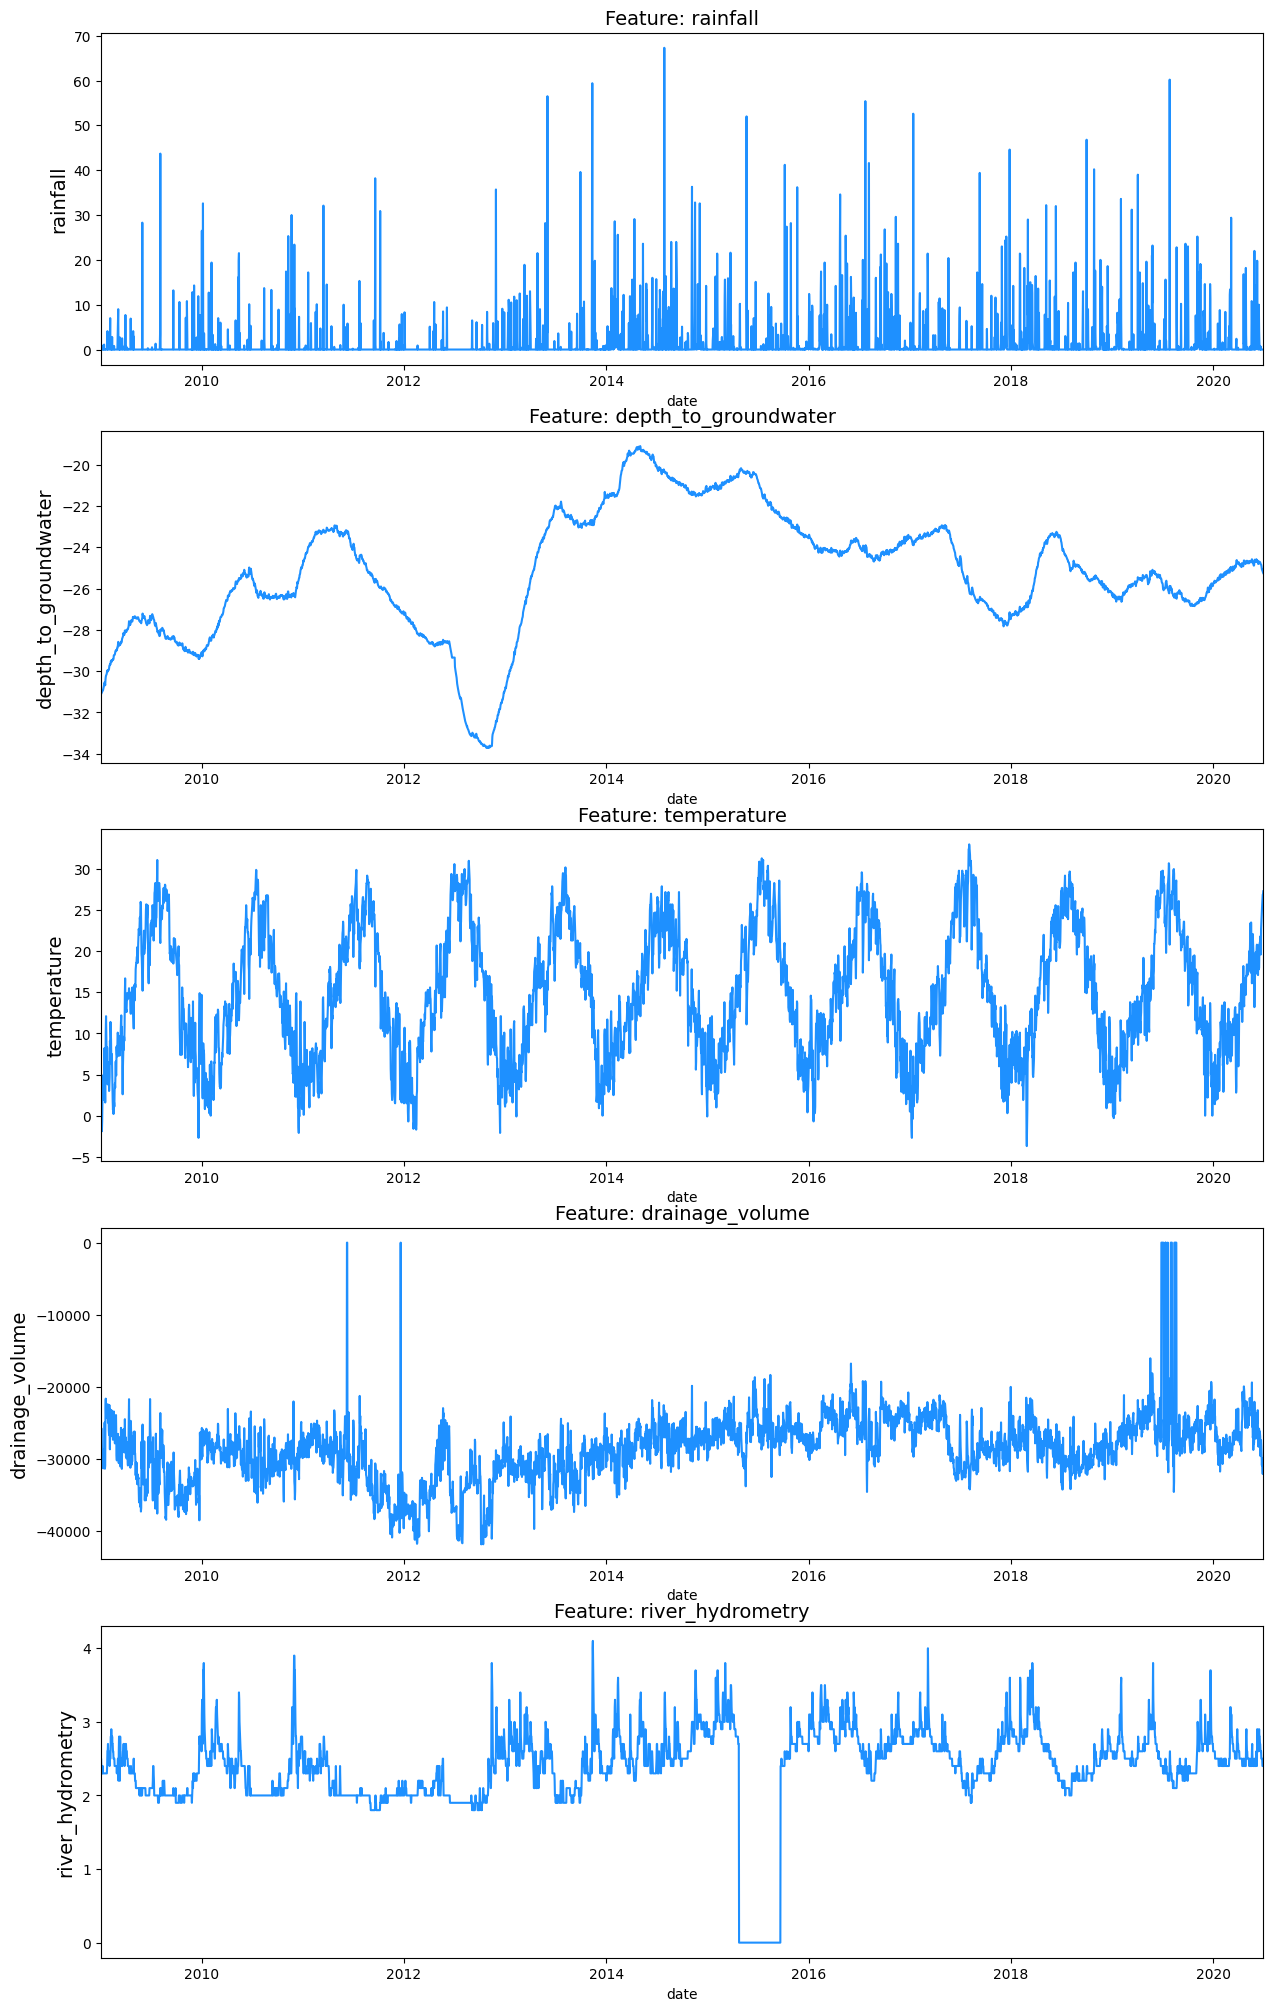

In [52]:
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 25))

for i, column in enumerate(df.drop('date', axis=1).columns):
    sns.lineplot(x=df['date'], y=df[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue')
    ax[i].set_title('Feature: {}'.format(column), fontsize=14)
    ax[i].set_ylabel(ylabel=column, fontsize=14)
                      
    ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])        

In [53]:
df = df.sort_values(by='date')

# Check time intervals
df['delta'] = df['date'] - df['date'].shift(1)

df[['date', 'delta']].head()

,date,delta
0,2009-01-01,NaT
1,2009-01-02,1 days
2,2009-01-03,1 days
3,2009-01-04,1 days
4,2009-01-05,1 days


In [54]:
df['delta'].sum(), df['delta'].count()

(Timedelta('4198 days 00:00:00'), 4198)

In [55]:
df.shape

(4199, 7)

In [56]:
df.isnull().sum()

date                     0
rainfall                 0
depth_to_groundwater    27
temperature              0
drainage_volume          1
river_hydrometry         0
delta                    1
dtype: int64

In [57]:
df.describe()

,date,rainfall,depth_to_groundwater,temperature,drainage_volume,river_hydrometry,delta
count,4199,4199.000000,4172.000000,4199.000000,4198.000000,4199.000000,4198
mean,2014-10-01 00:00:00,1.556633,-25.182534,15.030293,-28669.156619,2.372517,1 days 00:00:00
min,2009-01-01 00:00:00,0.000000,-33.710000,-3.700000,-41890.176000,0.000000,1 days 00:00:00
25%,2011-11-16 12:00:00,0.000000,-26.860000,8.800000,-31082.832000,2.100000,1 days 00:00:00
50%,2014-10-01 00:00:00,0.000000,-25.170000,14.700000,-28389.744000,2.400000,1 days 00:00:00
75%,2017-08-15 12:00:00,0.100000,-23.270000,21.400000,-26042.904000,2.700000,1 days 00:00:00
max,2020-06-30 00:00:00,67.300000,-19.100000,33.000000,0.000000,4.100000,1 days 00:00:00
std,NaN,5.217923,2.945074,7.794871,4570.686434,0.589088,0 days 00:00:00


In [58]:
df['depth_to_groundwater'] = df['depth_to_groundwater'].fillna(df['depth_to_groundwater'].median())


In [59]:
df = df.dropna(subset=['drainage_volume'])


In [60]:
df.isna().sum()


date                    0
rainfall                0
depth_to_groundwater    0
temperature             0
drainage_volume         0
river_hydrometry        0
delta                   1
dtype: int64

(14245.0, 18443.0)

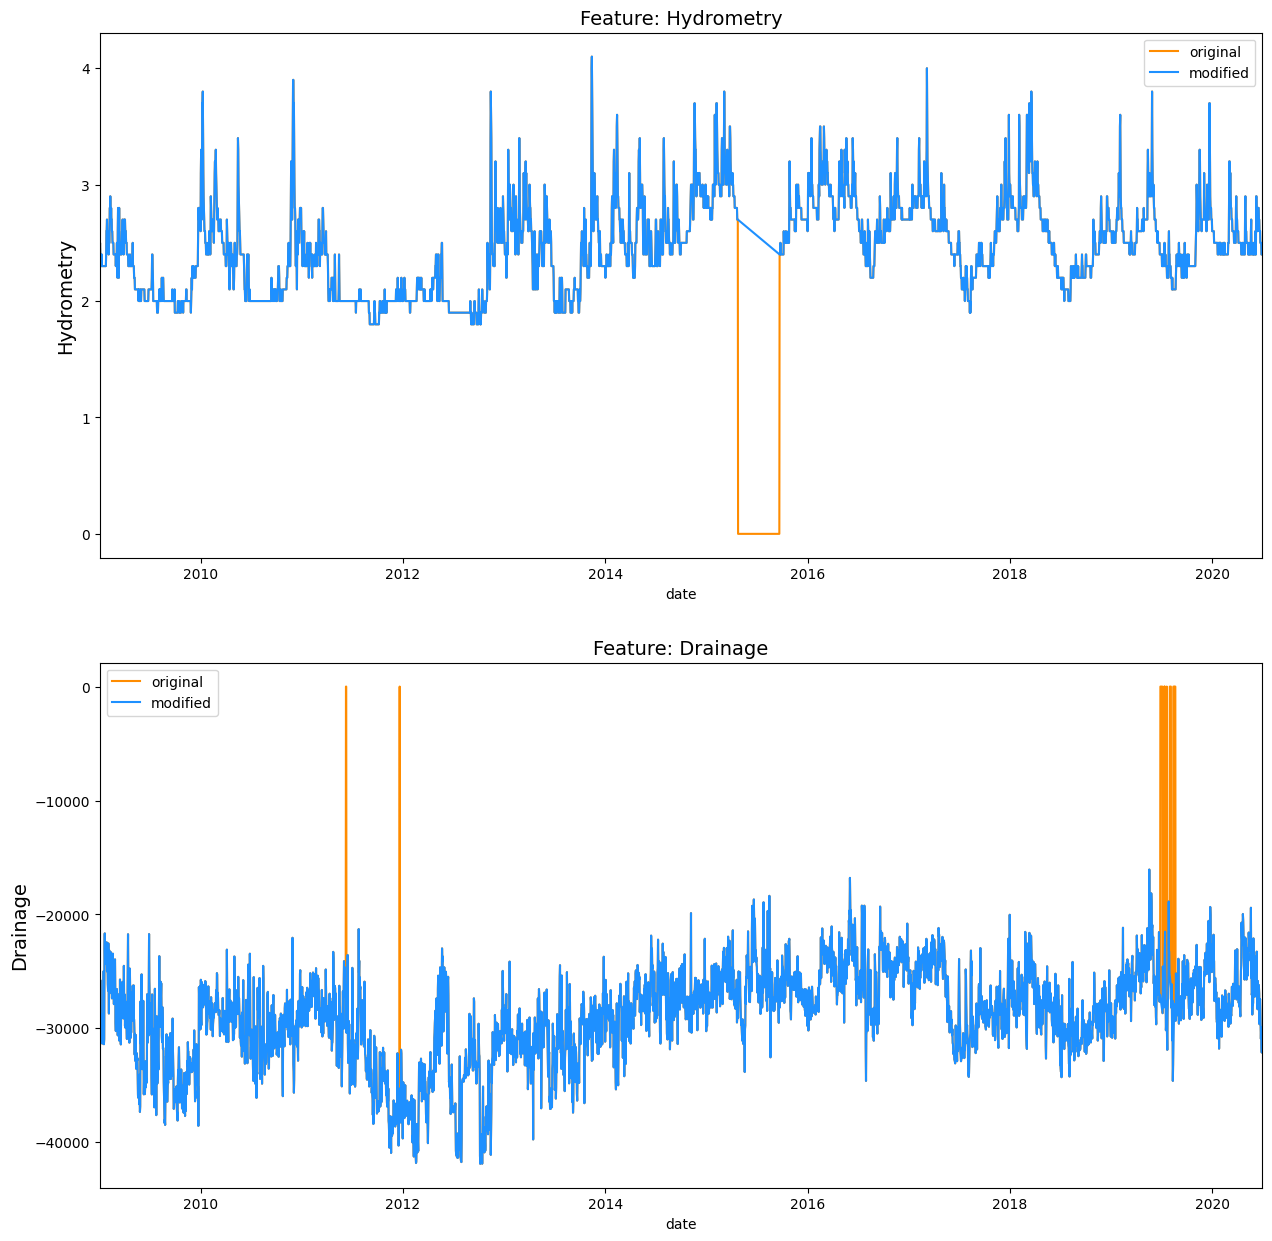

In [34]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

old_hydrometry = df['river_hydrometry'].copy()
df['river_hydrometry'] = df['river_hydrometry'].replace(0, np.nan)

sns.lineplot(x=df['date'], y=old_hydrometry, ax=ax[0], color='darkorange', label='original')
sns.lineplot(x=df['date'], y=df['river_hydrometry'].fillna(np.inf), ax=ax[0], color='dodgerblue', label='modified')
ax[0].set_title('Feature: Hydrometry', fontsize=14)
ax[0].set_ylabel(ylabel='Hydrometry', fontsize=14)
ax[0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

old_drainage = df['drainage_volume'].copy()
df['drainage_volume'] = df['drainage_volume'].replace(0, np.nan)

sns.lineplot(x=df['date'], y=old_drainage, ax=ax[1], color='darkorange', label='original')
sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(np.inf), ax=ax[1], color='dodgerblue', label='modified')
ax[1].set_title('Feature: Drainage', fontsize=14)
ax[1].set_ylabel(ylabel='Drainage', fontsize=14)
ax[1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

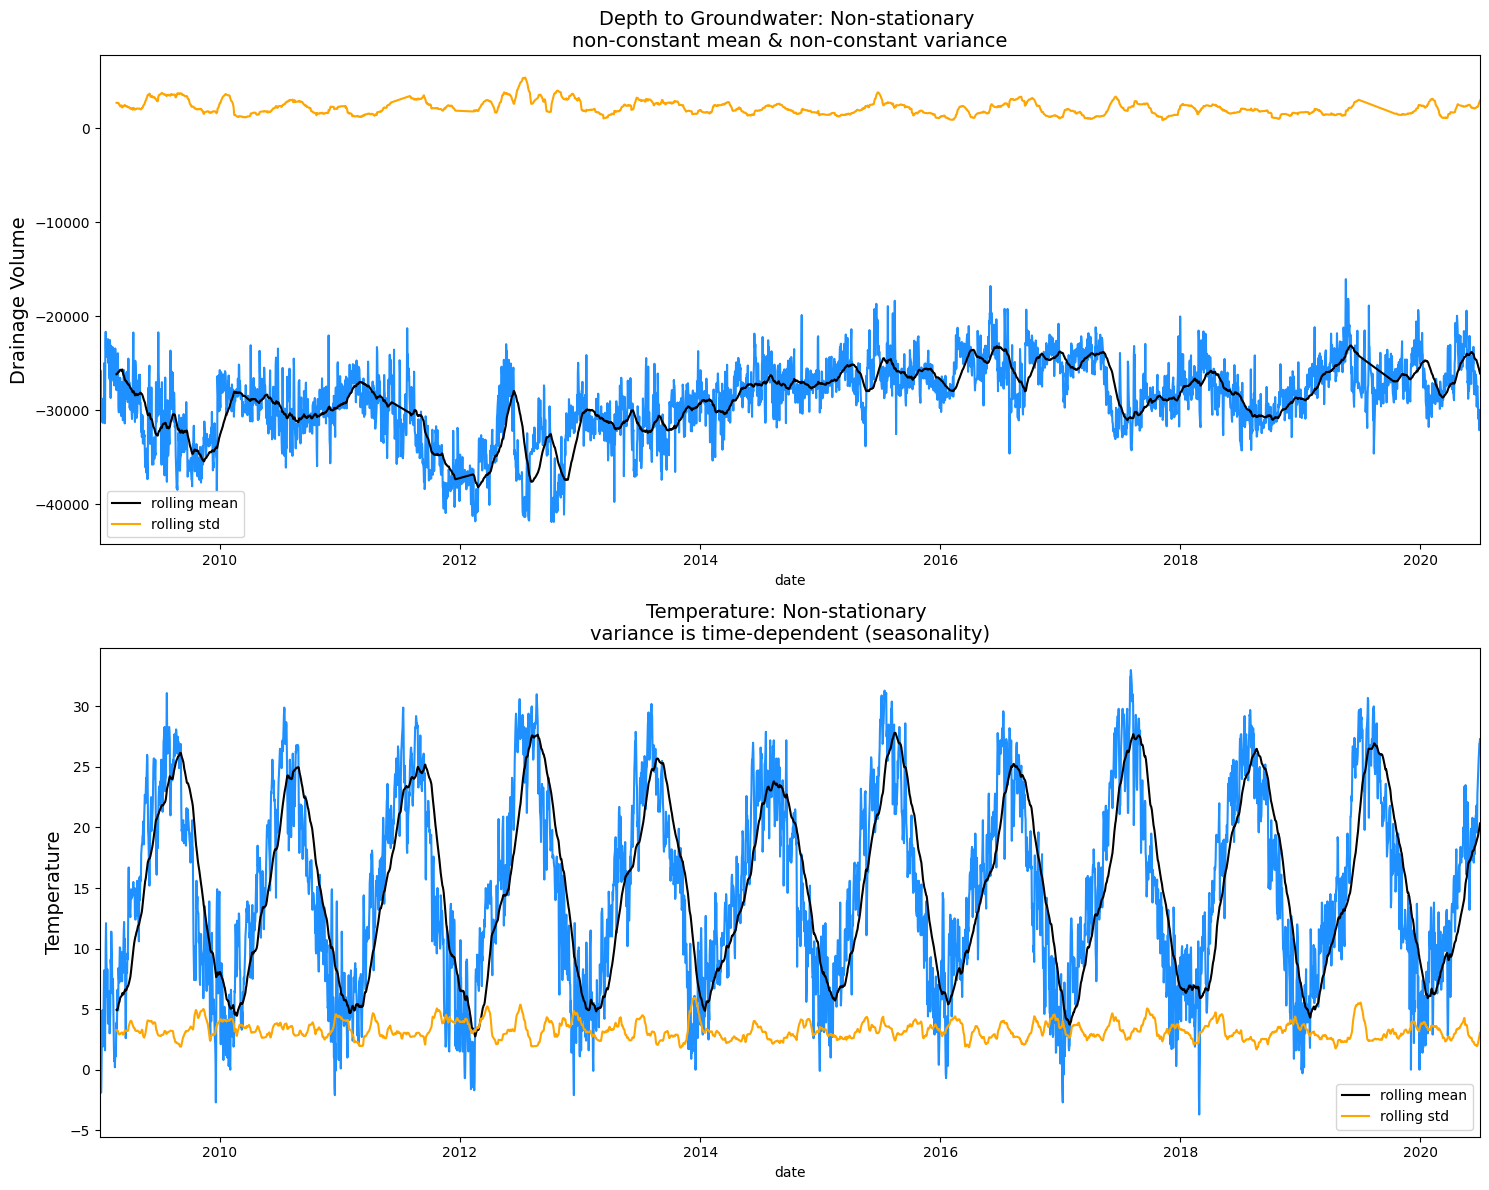

In [36]:
# A year has 52 weeks (52 weeks * 7 days per week) aporx.
rolling_window = 52
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

sns.lineplot(x=df['date'], y=df['drainage_volume'], ax=ax[0], color='dodgerblue')
sns.lineplot(x=df['date'], y=df['drainage_volume'].rolling(rolling_window).mean(), ax=ax[0], color='black', label='rolling mean')
sns.lineplot(x=df['date'], y=df['drainage_volume'].rolling(rolling_window).std(), ax=ax[0], color='orange', label='rolling std')
ax[0].set_title('Depth to Groundwater: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[0].set_ylabel(ylabel='Drainage Volume', fontsize=14)
ax[0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

sns.lineplot(x=df['date'], y=df['temperature'], ax=ax[1], color='dodgerblue')
sns.lineplot(x=df['date'], y=df['temperature'].rolling(rolling_window).mean(), ax=ax[1], color='black', label='rolling mean')
sns.lineplot(x=df['date'], y=df['temperature'].rolling(rolling_window).std(), ax=ax[1], color='orange', label='rolling std')
ax[1].set_title('Temperature: Non-stationary \nvariance is time-dependent (seasonality)', fontsize=14)
ax[1].set_ylabel(ylabel='Temperature', fontsize=14)
ax[1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

plt.tight_layout()
plt.show()

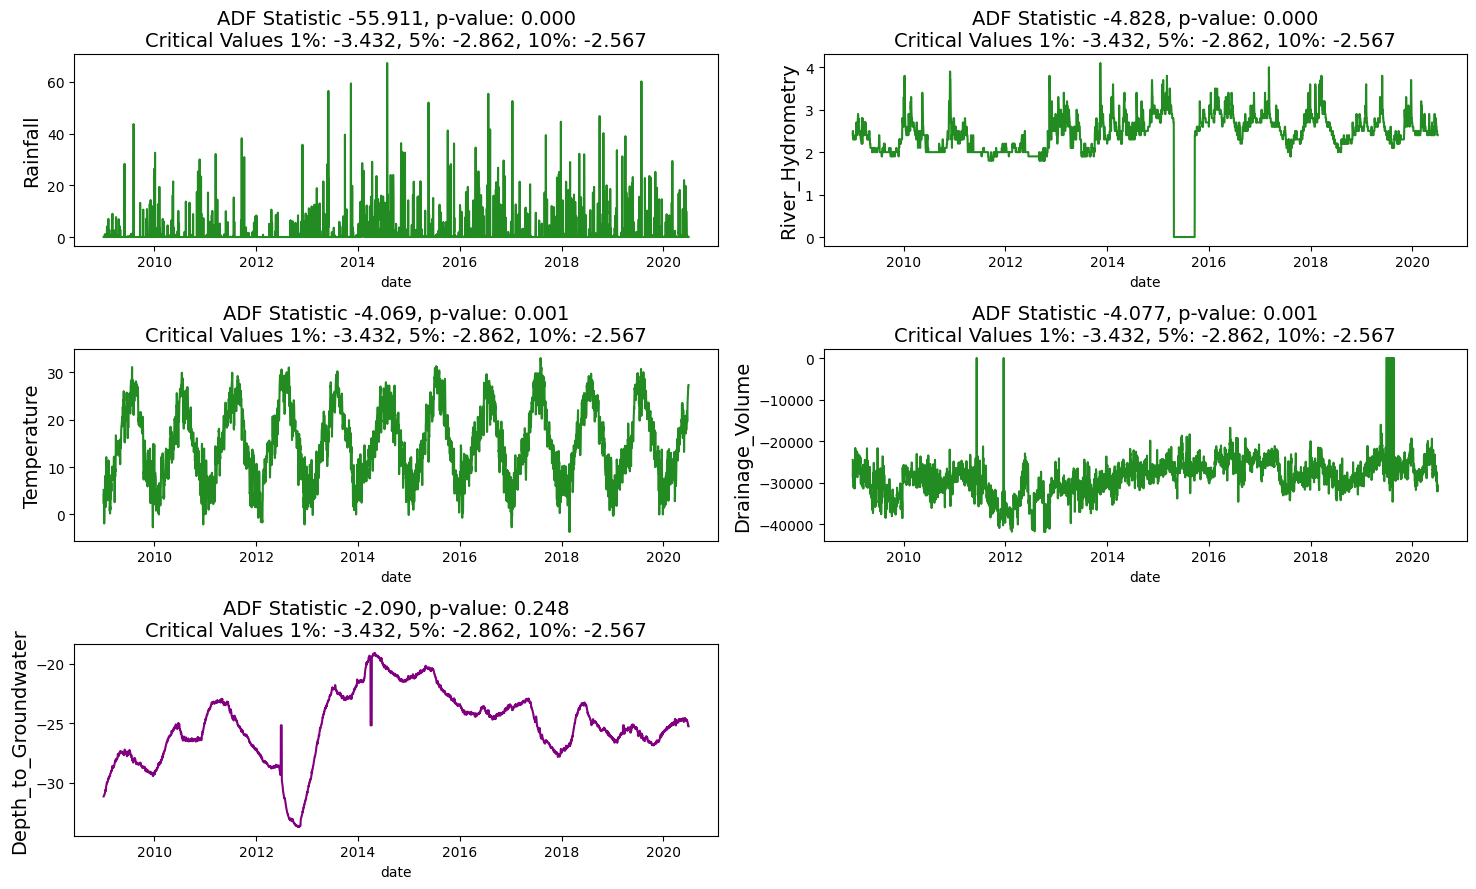

In [61]:
from statsmodels.tsa.stattools import adfuller

f, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'orange'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'red'
    else:
        linecolor = 'purple'
    sns.lineplot(x=df['date'], y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

visualize_adfuller_results(df['rainfall'].values, 'Rainfall', ax[0, 0])
visualize_adfuller_results(df['temperature'].values, 'Temperature', ax[1, 0])
visualize_adfuller_results(df['river_hydrometry'].values, 'River_Hydrometry', ax[0, 1])
visualize_adfuller_results(df['drainage_volume'].values, 'Drainage_Volume', ax[1, 1])
visualize_adfuller_results(df['depth_to_groundwater'].values, 'Depth_to_Groundwater', ax[2, 0])

f.delaxes(ax[2, 1])
plt.tight_layout()
plt.show()


In [62]:
import numpy as np

# Example checking 'river_hydrometry' series
print("Checking for NaN and Inf values in River Hydrometry...")
print("Number of NaN values:", np.isnan(df['river_hydrometry']).sum())
print("Number of Inf values:", np.isinf(df['river_hydrometry']).sum())


Checking for NaN and Inf values in River Hydrometry...
Number of NaN values: 0
Number of Inf values: 0


In [95]:
import pandas as pd


df['date'] = pd.to_datetime(df['date'])

# Using `.dt` accessor to simplify operations directly on DataFrame columns
df['day'] = df['date'].dt.day  # Extract day of month
df['day_of_year'] = df['date'].dt.dayofyear  # Extract day of year

# Use the ISO week date system (replacing deprecated `weekofyear`)
df['week_of_year'] = df['date'].dt.isocalendar().week  # Correct way to extract ISO week of year

df['quarter'] = df['date'].dt.quarter  # Extract quarter

# Season calculation assuming Northern Hemisphere 
df['season'] = ((df['date'].dt.month - 1) // 3 + 1).replace({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'})

# Output the DataFrame to see the first few rows
print(df.head())


        date  rainfall  depth_to_groundwater  temperature  drainage_volume  \
0 2009-01-01       0.0                -31.14          5.2       -24530.688   
1 2009-01-02       0.0                -31.11          2.3       -28785.888   
2 2009-01-03       0.0                -31.07          4.4       -25766.208   
3 2009-01-04       0.0                -31.05          0.8       -27919.296   
4 2009-01-05       0.0                -31.01         -1.9       -29854.656   

   river_hydrometry  delta  year  month  day  day_of_year  week_of_year  \
0               2.4    NaT  2009      1    1            1             1   
1               2.5 1 days  2009      1    2            2             1   
2               2.4 1 days  2009      1    3            3             1   
3               2.4 1 days  2009      1    4            4             1   
4               2.3 1 days  2009      1    5            5             2   

   quarter  season  test_week_of_year  
0        1  Winter                  1  


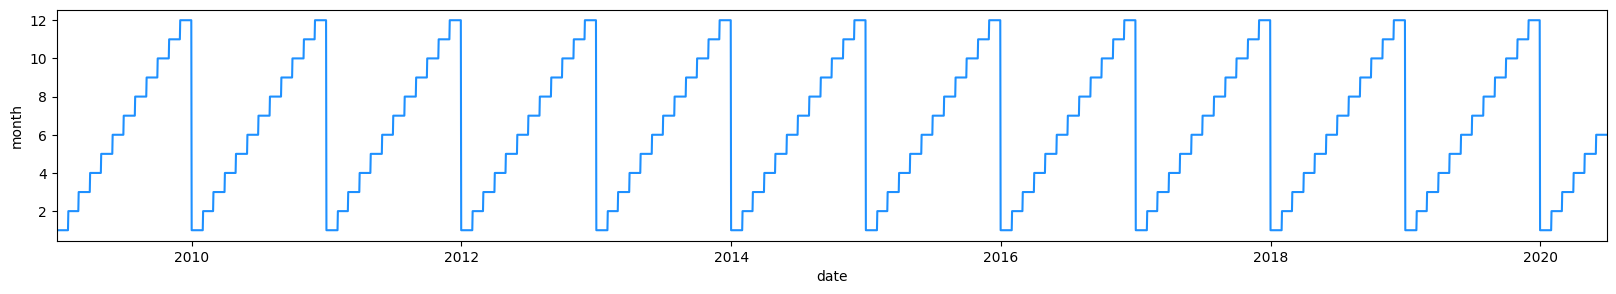

In [96]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 3))

sns.lineplot(x=df['date'], y=df['month'], color='dodgerblue')
ax.set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
plt.show()

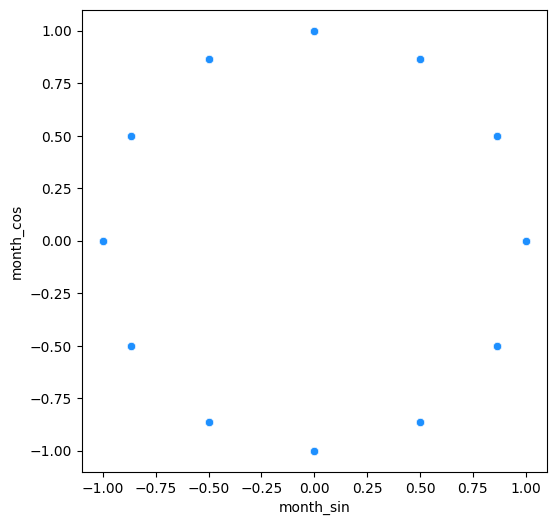

In [97]:
month_in_year = 12
df['month_sin'] = np.sin(2*np.pi*df['month']/month_in_year)
df['month_cos'] = np.cos(2*np.pi*df['month']/month_in_year)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

sns.scatterplot(x=df.month_sin, y=df.month_cos, color='dodgerblue')
plt.show()

In [98]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns =  [
    'rainfall', 'temperature', 'drainage_volume', 
    'river_hydrometry', 'depth_to_groundwater'
]

for column in core_columns:
    decomp = seasonal_decompose(df[column], period=52, model='additive', extrapolate_trend='freq')
    df[f"{column}_trend"] = decomp.trend
    df[f"{column}_seasonal"] = decomp.seasonal


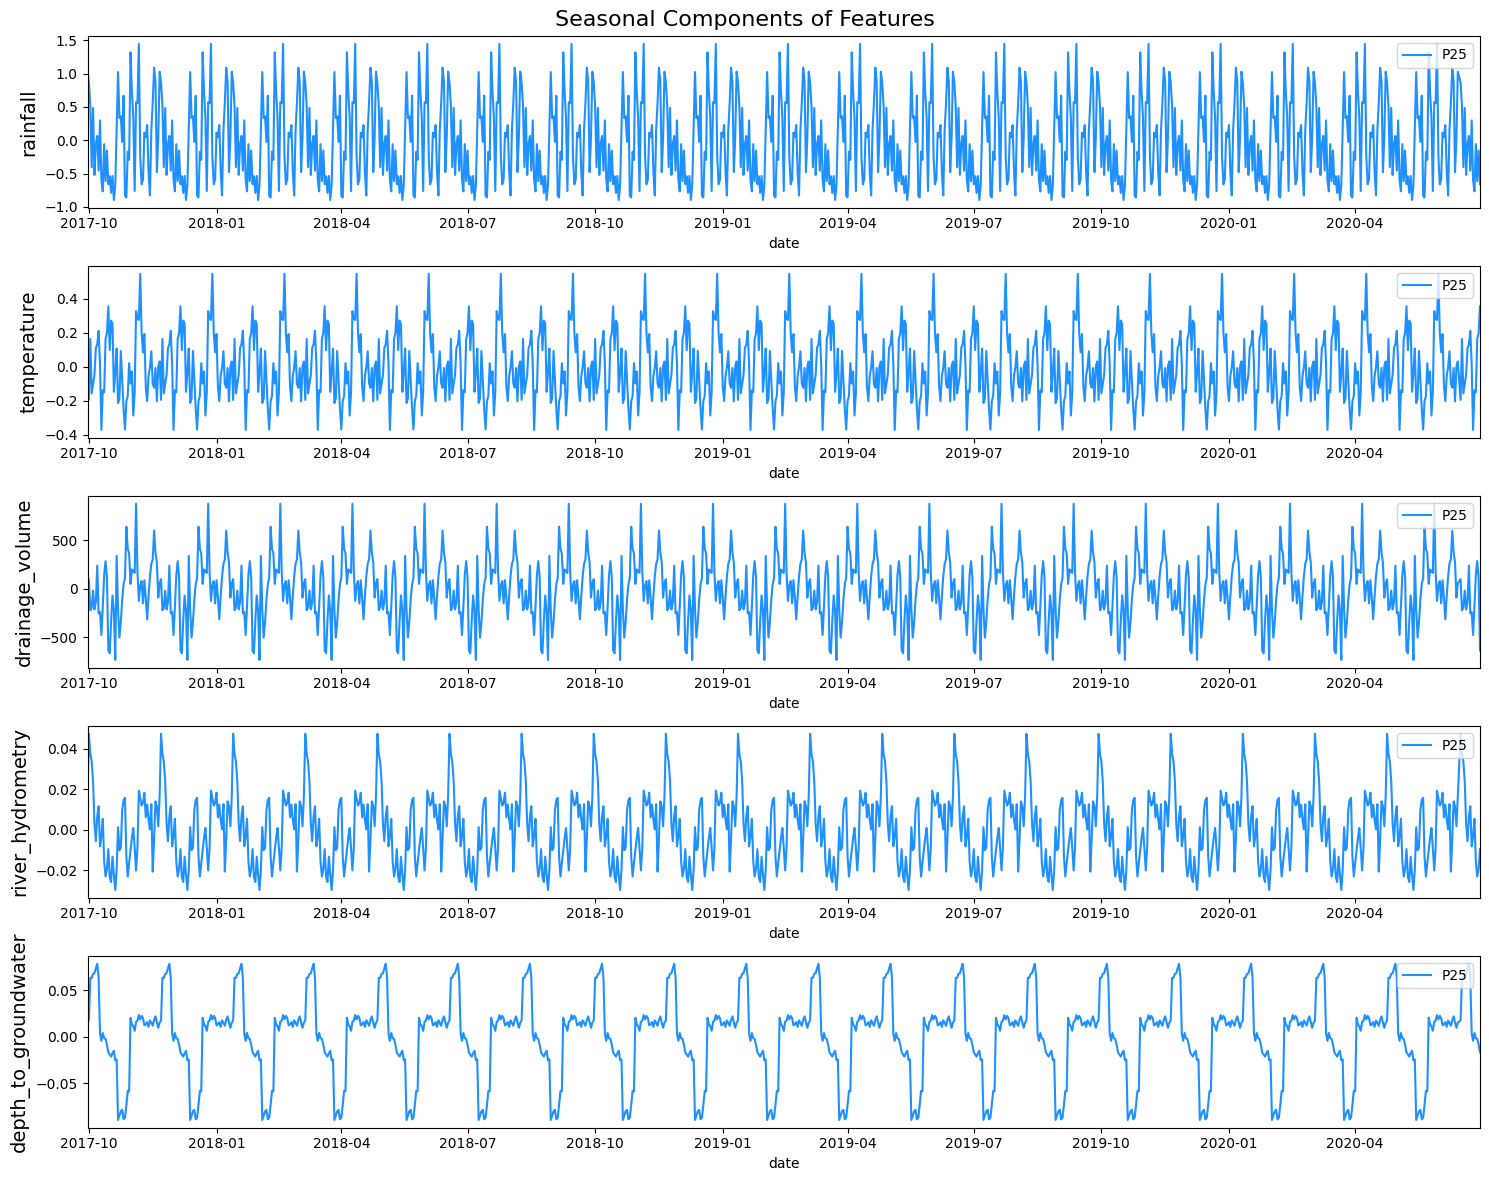

In [100]:
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 12))
f.suptitle('Seasonal Components of Features', fontsize=16)

for i, column in enumerate(core_columns):
    sns.lineplot(x=df['date'], y=df[column + '_seasonal'], ax=ax[i], color='dodgerblue', label='P25')
    ax[i].set_ylabel(ylabel=column, fontsize=14)
    ax[i].set_xlim([date(2017, 9, 30), date(2020, 6, 30)])
    
plt.tight_layout()
plt.show()

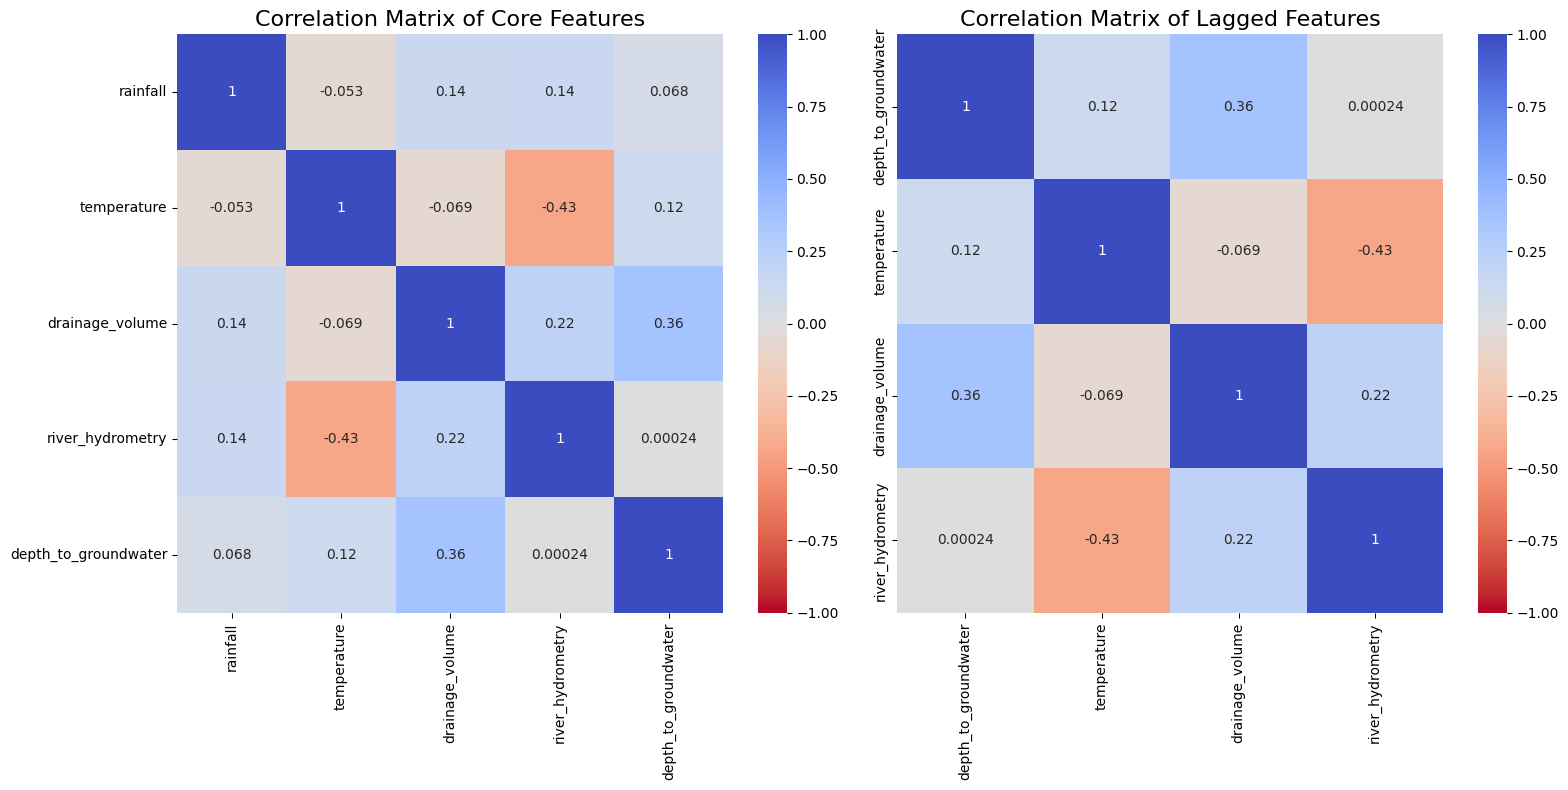

In [102]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

corrmat = df[core_columns].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[0])
ax[0].set_title('Correlation Matrix of Core Features', fontsize=16)

shifted_cols = [
    'depth_to_groundwater',         
    'temperature',
    'drainage_volume', 
    'river_hydrometry'
]
corrmat = df[shifted_cols].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[1])
ax[1].set_title('Correlation Matrix of Lagged Features', fontsize=16)


plt.tight_layout()
plt.show()

In [103]:
from sklearn.model_selection import TimeSeriesSplit

N_SPLITS = 3

X = df['date']
y = df['depth_to_groundwater']

folds = TimeSeriesSplit(n_splits=N_SPLITS)

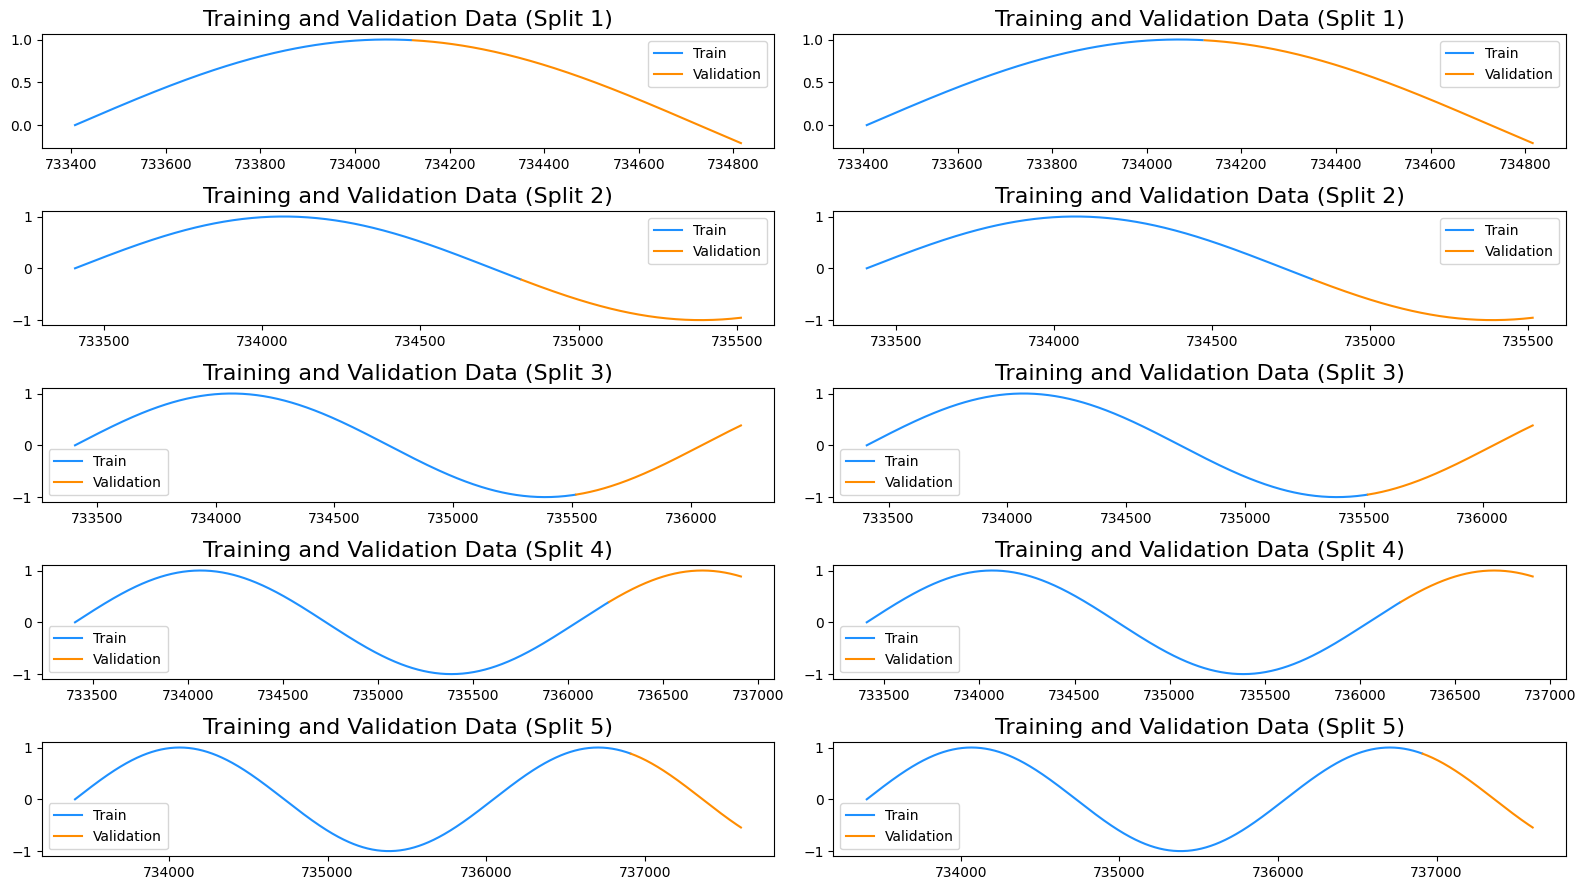

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import date
from sklearn.model_selection import TimeSeriesSplit

# Assuming X and y are your features and targets and are ordered by time
N_SPLITS = 5
folds = TimeSeriesSplit(n_splits=N_SPLITS)

# Sample data creation for demonstration
X = np.linspace(date(2009, 1, 1).toordinal(), date(2020, 6, 30).toordinal(), 1000)
y = np.sin(np.linspace(0, 10, 1000))  # Just as an example

f, ax = plt.subplots(nrows=N_SPLITS, ncols=2, figsize=(16, 9))

for i, (train_index, valid_index) in enumerate(folds.split(X)):
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

    sns.lineplot(x=X_train, y=y_train, ax=ax[i, 0], color='dodgerblue', label='Train')
    sns.lineplot(x=X_valid, y=y_valid, ax=ax[i, 0], color='darkorange', label='Validation')
    
    # For the second subplot, just showing how to handle the train/validation split visually
    sns.lineplot(x=X_train, y=y_train, ax=ax[i, 1], color='dodgerblue', label='Train')
    sns.lineplot(x=X_valid, y=y_valid, ax=ax[i, 1], color='darkorange', label='Validation')

    ax[i, 0].set_title(f"Training and Validation Data (Split {i+1})", fontsize=16)
    ax[i, 1].set_title(f"Training and Validation Data (Split {i+1})", fontsize=16)
    ax[i, 0].legend()
    ax[i, 1].legend()

plt.tight_layout()
plt.show()


In [108]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler  # Example scaler
from sklearn.linear_model import LinearRegression  # Example model
from sklearn.model_selection import train_test_split
import datetime as dt 


# Create a training and validation split
train_size = int(0.85 * len(df))
test_size = len(df) - train_size
univariate_df = df[['date', 'depth_to_groundwater']].copy()
univariate_df.columns = ['ds', 'y']

# Convert 'ds' to numerical (ordinal) for modeling if it's not already
univariate_df['ds'] = pd.to_datetime(univariate_df['ds']).map(dt.datetime.toordinal)

# Splitting the data
train = univariate_df.loc[:train_size, :]
x_train, y_train = train[['ds']], train['y']
x_valid, y_valid = univariate_df.loc[train_size:, ['ds']], univariate_df.loc[train_size:, 'y']

# Defining a simple pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling data
    ('model', LinearRegression())  # Regression model
])

# Fit the pipeline on the training data
pipeline.fit(x_train, y_train)

# Use the pipeline to make predictions (safely, with scaling)
y_pred_train = pipeline.predict(x_train)
y_pred_valid = pipeline.predict(x_valid)



In [109]:
print(y_pred_train)

[-27.33341817 -27.33215913 -27.33090009 ... -22.84367543 -22.84241638
 -22.84115734]


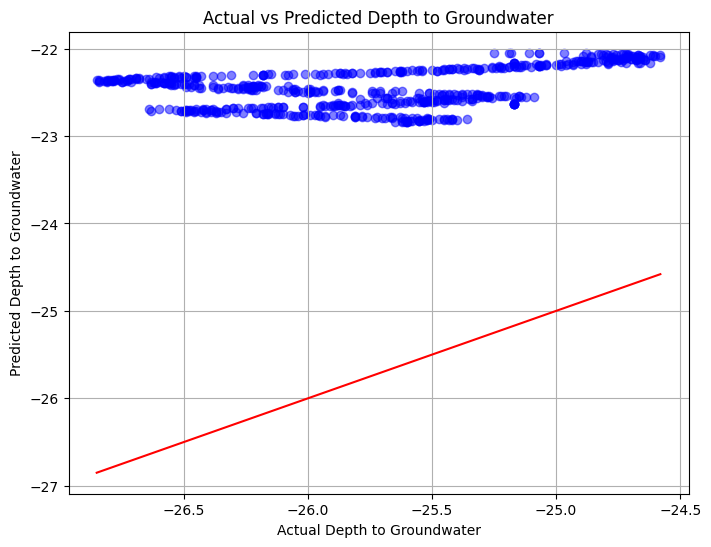

In [110]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_valid, y_pred_valid, color='blue', alpha=0.5)
plt.plot([min(y_valid), max(y_valid)], [min(y_valid), max(y_valid)], color='red')  # Perfect predictions line
plt.xlabel('Actual Depth to Groundwater')
plt.ylabel('Predicted Depth to Groundwater')
plt.title('Actual vs Predicted Depth to Groundwater')
plt.grid(True)
plt.show()


In [112]:
from statsmodels.tsa.arima.model import ARIMA

# Specify the order parameter (p, d, q) based on your data characteristics and prior analysis
# For example, (2, 1, 1) represents a second-order autoregressive model with first-order differencing and a first-order moving average
order = (2, 1, 1)

# Fit the ARIMA model
arima_model = ARIMA(y_train, order=order)
arima_result = arima_model.fit()

# Print model summary
print(arima_result.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3569
Model:                 ARIMA(2, 1, 1)   Log Likelihood                1011.586
Date:                Mon, 15 Apr 2024   AIC                          -2015.173
Time:                        14:37:29   BIC                          -1990.454
Sample:                             0   HQIC                         -2006.360
                               - 3569                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146     33.175      0.000      1.000     -65.007      65.036
ar.L2         -0.0013      0.989     -0.001      0.999      -1.940       1.938
ma.L1          0.0146     33.174      0.000      1.0

In [113]:
# Make predictions
y_pred_train_arima = arima_result.predict(start=0, end=train_size-1)
y_pred_valid_arima = arima_result.predict(start=train_size, end=len(univariate_df)-1)



ValueError: x and y must have same first dimension, but have shapes (3569, 1) and (3568,)

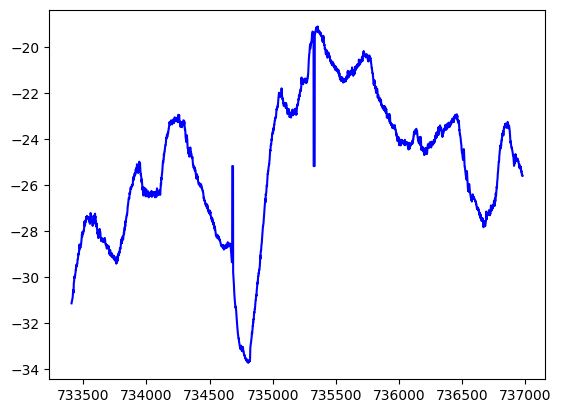

In [114]:
import matplotlib.pyplot as plt

# Plot training predictions
plt.plot(x_train, y_train, label='Actual (Training)', color='blue')
plt.plot(x_train, y_pred_train_arima, label='Predicted (Training)', color='red')

# Plot validation predictions
plt.plot(x_valid, y_valid, label='Actual (Validation)', color='green')
plt.plot(x_valid, y_pred_valid_arima, label='Predicted (Validation)', color='orange')

# Add labels and legend
plt.xlabel('Date (Ordinal)')
plt.ylabel('Depth to Groundwater')
plt.title('ARIMA Model Predictions')
plt.legend()
plt.show()


In [115]:
# Convert 'ds' to numerical (ordinal) for modeling 
univariate_df['ds'] = pd.to_datetime(univariate_df['ds']).map(dt.datetime.toordinal)

# Splitting the data
train = univariate_df.iloc[:train_size, :]  # Note the change from .loc to .iloc
x_train, y_train = train[['ds']], train['y']  


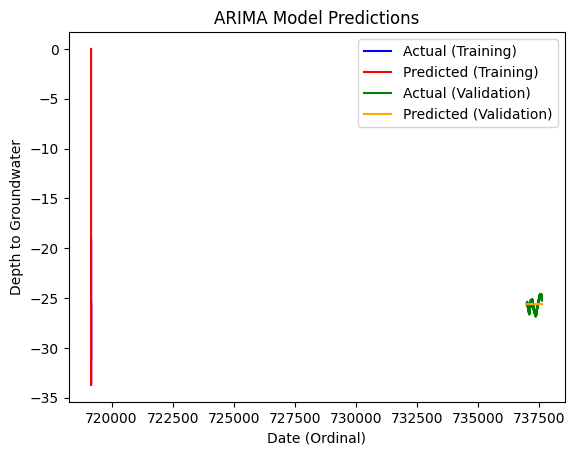

In [116]:
import matplotlib.pyplot as plt

# Plot training predictions
plt.plot(x_train, y_train, label='Actual (Training)', color='blue')
plt.plot(x_train, y_pred_train_arima, label='Predicted (Training)', color='red')

# Plot validation predictions
plt.plot(x_valid, y_valid, label='Actual (Validation)', color='green')
plt.plot(x_valid, y_pred_valid_arima, label='Predicted (Validation)', color='orange')

# Add labels and legend
plt.xlabel('Date (Ordinal)')
plt.ylabel('Depth to Groundwater')
plt.title('ARIMA Model Predictions')
plt.legend()
plt.show()


In [117]:
from sklearn.preprocessing import MinMaxScaler

data = univariate_df.filter(['y'])
#Convert the dataframe to a numpy array
dataset = data.values

scaler = MinMaxScaler(feature_range=(-1, 0))
scaled_data = scaler.fit_transform(dataset)

scaled_data[:10]

array([[-0.82409309],
       [-0.8220397 ],
       [-0.81930185],
       [-0.81793292],
       [-0.81519507],
       [-0.81451061],
       [-0.81177276],
       [-0.81040383],
       [-0.80971937],
       [-0.80561259]])

In [118]:
# Defines the rolling window
look_back = 52
# Split into train and test sets
train, test = scaled_data[:train_size-look_back,:], scaled_data[train_size-look_back:,:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(look_back, len(dataset)):
        a = dataset[i-look_back:i, 0]
        X.append(a)
        Y.append(dataset[i, 0])
    return np.array(X), np.array(Y)

x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

print(len(x_train), len(x_test))

3464 630


In [122]:
# Lets predict with the model
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

# invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])

test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Get the root mean squared error (RMSE) and MAE
score_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
score_mae = mean_absolute_error(y_test[0], test_predict[:,0])
print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))

109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
RMSE: 6.2765879909066005
